# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

#ignore warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [34]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income =='>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = data[data.income =='>50K'].shape[0]/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.2478439697492371%


In [53]:
for col in data:
    print(col, list(data[col].sort_values().unique()))

age [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
workclass [' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
education_level [' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
education-num [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
marital-status [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
occupation [' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cl

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [214]:
type(data[['income']].head())

pandas.core.frame.DataFrame

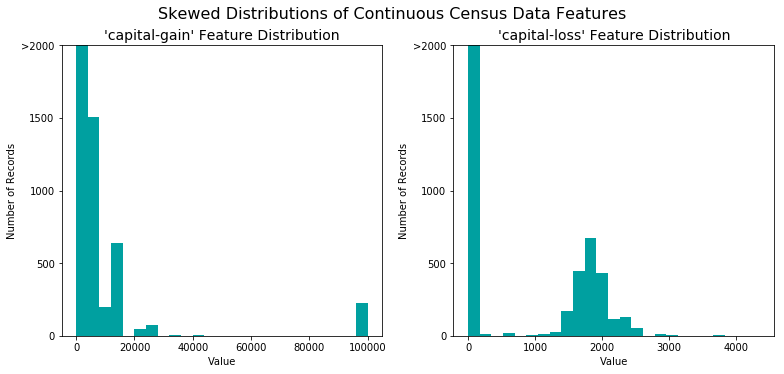

In [69]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

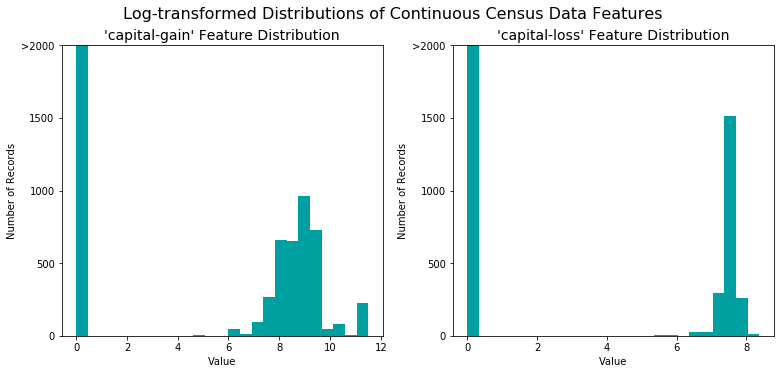

In [73]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [84]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [189]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [190]:
# Import train_test_split
from sklearn.model_selection import train_test_split #Python 3: migrated from cross_validation library

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [193]:
np.sum(income)

11208

In [194]:
total = income.shape[0] #total number of records
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = total - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case


# TODO: Calculate accuracy, precision and recall
accuracy = TP/total
recall = TP/(TP+FN)
precision = TP/(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*(recall*precision)/(beta**2*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

## Answer
**Note:** As this is an intriguing topic, especially in regards to real-world applications, I have attempted to provide analysis for each of the models listed with references included at the bottom or inline as appropriate.  I hope to use this information for my own reference in the future. <br>
### Gaussian Naive Bayes (GaussianNB) 
**Real-world Applications:** This method is for classification problems and can be applied for NLP (Natural Language Processing) in combination with Bag of Words vectorization such as for the use case of email spam detection.  Other real-world applications include: 
- Sentiment analysis and text classification
- Recommendation systems like Netflix, Amazon
- Facial recognition <br>

**Strengths:** Strengths include quick computation performance when dealing with very large amounts of data and the fact that it performs well when features can be treated independently (such as words in an email for spam detection). Naive Bayes is a good choice when CPU and memory resources are a limiting factor. <br>
**Weaknesses:** Disadvantages include the fact that it is naive in that it doesn't handle well features that may not be independent --  that is, it can’t learn interactions between features.  (that said,  even if the NB assumption doesn’t hold, a NB classifier still often does a great job in practice) <br>
**Candidacy for this project:** This may not be a good candidate for this project in that many of the provided census features may not be independent -- for example, your education-level, marital status, relationship change with age. <br>
### Decision Trees
**Real-world Applications:** This method is for classification problems and can be similarly applied to email spam detection as well other use cases like dynamic price optimization (for product pricing).  Other use cases include:
- Investment decisions
- Predicting Customer churn
- predicting bank loan defaulters
- Build vs Buy decisions
- Sales lead qualifications <br>

**Strengths:** Strengths include the fact that they are resistant to outliers, hence requiring comparatively less data preprocessing -- Trees are less prone to skews in data. If the data is not normalized, skewed, then trees are more robust to such scenarios. In addition, decision trees are relatively easy to use and understand, and can handle both categorical and numerical data. <br>
**Weaknesses:** One  disadvantage is that they don’t support online learning, so you have to rebuild your tree when new examples come on. Another disadvantage is that they easily overfit, but that’s where ensemble methods like random forests (or boosted trees) come in. Decision Trees can also take a lot of memory (the more features you have, the deeper and larger your decision tree is likely to be) <br>
**Candidacy for this project:** Given the data only has tens of thousands of records (as opposed to millions+), this algorithm in combination with ensemble methods may be a good candidate.

### Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
**Real-world Applications:** For boosted (decision) trees, they are most useful when you have unbalanced class distribution, e.g. cancer vs non-cancerous cell classification where cancerous cells are rare say 1%.  
**Strengths:** include performance optimization (such as with Bagging and Random Forest) when dealing with very large datasets as well as dealing with unbalanced class distribution as mentioned earlier. <br>
**Random Forest Deep Dive** <br>
**Real-world Applications:** Random Forest is an ensemble of decision trees. It can solve both regression and classification problems with large data sets. Random Forest can be used in real-world applications such as:
- Predicting patients for high risks
- Predicting parts failures in manufacturing
- Predict loan defaulters <br> 

**Strengths:** It also helps identify most significant variables from thousands of input variables. Random Forest is highly scalable to any number of dimensions and has generally quite acceptable performances. <br>
**Weaknesses:** Disadvantages with Random Forest is that learning (training) may be slow (depending on the parameterization) and it is not possible to iteratively improve the generated models. <br>
**Candidacy for this project:** Given the large number of possible features, and the fact that the dataset is not too large, this or one of the other ensemble methods may be a good candidate 

### K-Nearest Neighbors (KNeighbors)
**Real-world Applications:** K-nearest neighbors is a classification algorithm, which is a subset of supervised learning. For example: If we have a dataset of football players, their positions, and their measurements, and we want to assign positions to football players in a new dataset where we have measurements but no positions, we might use K-nearest neighbors.
KNN is used in a variety of applications such as economic forecasting, data compression and genetics <br>
**Strengths:** one of the most attractive features of the K-nearest neighbor algorithm is that is simple to understand and easy to implement. With zero to little training time, it can be a useful tool for off-the-bat analysis of some data set you are planning to run more complex algorithms on. Furthermore, KNN works just as easily with multiclass data sets whereas other algorithms are hardcoded for the binary setting. Finally, as we mentioned earlier, the non-parametric nature of KNN gives it an edge in certain settings where the data may be highly “unusual”. <br>
**Weaknesses:** One of the obvious drawbacks of the KNN algorithm is the computationally expensive testing phase which is impractical in industry settings. Note the rigid dichotomy between KNN and the more sophisticated Neural Network which has a lengthy training phase albeit a very fast testing phase. Furthermore, KNN can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor. <br>
**Candidacy for this project:** Given there are many features to the data and we don't have a lot of computational power (running on just my laptop), KNN may not be the best candidate for this project. <br>
**reference:** https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
### Stochastic Gradient Descent Classifier (SGDC)
**Real-world Applications:** Stochastic gradient descent is best suited for unconstrained optimisation problems.  In the context of large-scale learning, SGD has received considerable attention and is applied to:
- text classification
- natural language processing. <br> 

**Strengths:** Two key benefits of Stochastic Gradient Descent are efficiency and the ease of implementation.  One of the distinct advantages of using Stochastic Gradient Descent is that it does the calculations faster than gradient descent and batch gradient descent. However, gradient descent is the best approach if one wants a speedier result.
Also, on massive datasets, stochastic gradient descent can converges faster because it performs updates more frequently.  
**Weaknesses:** SGD requires a number of hyperparameters and a number of iterations
It is also sensitive to feature scaling.
**Candidacy for this project:** Given we haven't covered SGDC in detail (e.g. the necessary hyperparameters), it may not be best to use this algorithm for fear of it not being properly tuned.  Although we did perform normalization to scale some of our features, it's probably best to save this model for future efforts. <br>
reference: https://analyticsindiamag.com/how-stochastic-gradient-descent-is-solving-optimisation-problems-in-deep-learning/


### Support Vector Machines (SVM)
**Real-world Applications:** SVMs use cases include:
- detecting persons with common diseases such as diabetes
- hand-written character recognition
- text classification problems where very high-dimensional spaces are the norm 
- text categorization - e.g. news articles by topic
- stock market price prediction <br> 

**Strengths:** SVMs are widely used in pattern recognition and classification problems — when your data has exactly two classes.  High accuracy, nice theoretical guarantees regarding overfitting, and with an appropriate kernel they can work well even if you’re data isn’t linearly separable in the base feature space. <br>
**Disadvantages:** SVMs are however memory-intensive, hard to interpret, and difficult to tune <br>
**Candidacy for this project:** Given the data only has tens of thousands of records (as opposed to millions+), and we are only attempting to classify between 2 classes of income, this algorithm (perhaps in combination with an ensemble method?) may be a good candidate.  That said, as we are running the model on my laptop, the memory and processing power may be insufficient so we may have to revisit this.

### Logistic Regression
**Real-world Applications:** Logistic regression performs binary classification, so the label outputs are binary. Logistic regression can be used in cases such as:
- Predicting the Customer Churn
- Credit Scoring & Fraud Detection
- Measuring the effectiveness of marketing campaigns <br>

**Strengths:** Logistic regression provides lots of ways to regularize your model, and you don’t have to worry as much about your features being correlated, like you do in Naive Bayes. You also have a nice probabilistic interpretation, and you can easily update your model to take in new data, unlike decision trees or SVMs.  Use it if you want a probabilistic framework or if you expect to receive more training data in the future that you want to be able to quickly incorporate into your model. Logistic regression can also help you understand the contributing factors behind the prediction, and is not just a black box method. <br>
**Disadvantages:** Cannot be used for classification beyond 2 classes <br>
**Candidacy for this project:** Given we are only attempting to classify between 2 classes of income, this algorithm (perhaps in combination with an ensemble method?) may be a good candidate.

### References:
**Primary reference:** https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f <br>
**Other references:** <br>
https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60 <br>
http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/ <br>
https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96 <br>
https://www.quora.com/In-what-real-world-applications-is-the-decision-tree-classifier-used <br>
https://medium.com/@ailabs/5-machine-learning-algorithms-and-their-proper-use-cases-a8cfd0cedb51 <br>
https://bigdata-madesimple.com/top-10-real-life-examples-of-machine-learning/ <br>
https://www.edureka.co/blog/machine-learning-applications/ <br>
https://www.ubuntupit.com/top-20-best-machine-learning-applications-in-real-world/ <br>

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [270]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    
    learner = learner()
    learner.fit(X_train[:sample_size],  y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = (end - start)
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [247]:
MultinomialNB.__name__

'MultinomialNB'

MultinomialNB trained on 361 samples.
MultinomialNB trained on 3617 samples.
MultinomialNB trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


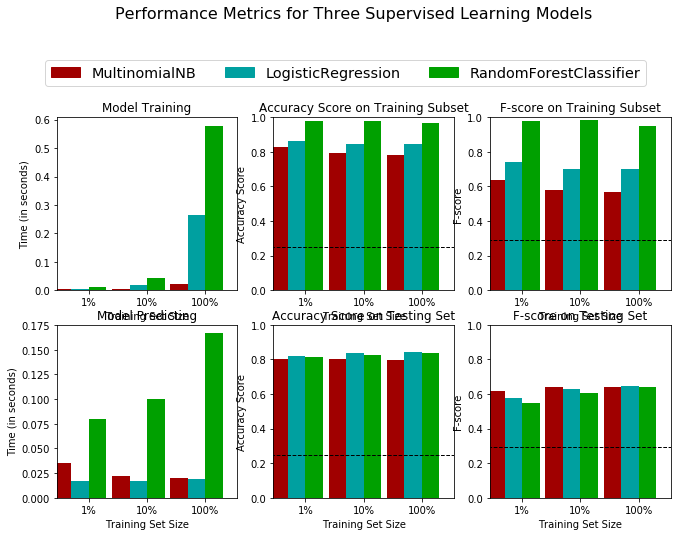

In [271]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# TODO: Initialize the three models
clf_A = MultinomialNB
clf_B = LogisticRegression
clf_C = RandomForestClassifier

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train)//10
samples_1 = len(y_train)//100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__name__ #__class__.__name__ # this has been updated
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]): 
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [272]:
results

{'MultinomialNB': {0: {'train_time': 0.003760099411010742,
   'pred_time': 0.03485298156738281,
   'acc_train': 0.8266666666666667,
   'acc_test': 0.8035378662244334,
   'f_train': 0.638586956521739,
   'f_test': 0.6149512459371614},
  1: {'train_time': 0.0046999454498291016,
   'pred_time': 0.02174687385559082,
   'acc_train': 0.7933333333333333,
   'acc_test': 0.8043117744610282,
   'f_train': 0.5803571428571429,
   'f_test': 0.6432889963724304},
  2: {'train_time': 0.022435665130615234,
   'pred_time': 0.020441055297851562,
   'acc_train': 0.7833333333333333,
   'acc_test': 0.7964621337755666,
   'f_train': 0.5652173913043478,
   'f_test': 0.6413403467757647}},
 'LogisticRegression': {0: {'train_time': 0.0039827823638916016,
   'pred_time': 0.01715397834777832,
   'acc_train': 0.86,
   'acc_test': 0.8186843559977889,
   'f_train': 0.7386363636363635,
   'f_test': 0.5773195876288659},
  1: {'train_time': 0.016721010208129883,
   'pred_time': 0.016871929168701172,
   'acc_train': 0.84

**Analysis** <br> 
It looks like Logistic Regression (0.6476) and Gaussian Naive Bayes (0.6413) methods had the 2 highest F-Scores for the test data when the full training set is used, with Random Forest not far behind (0.6397). 

MultinomialNB trained on 361 samples.
MultinomialNB trained on 3617 samples.
MultinomialNB trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


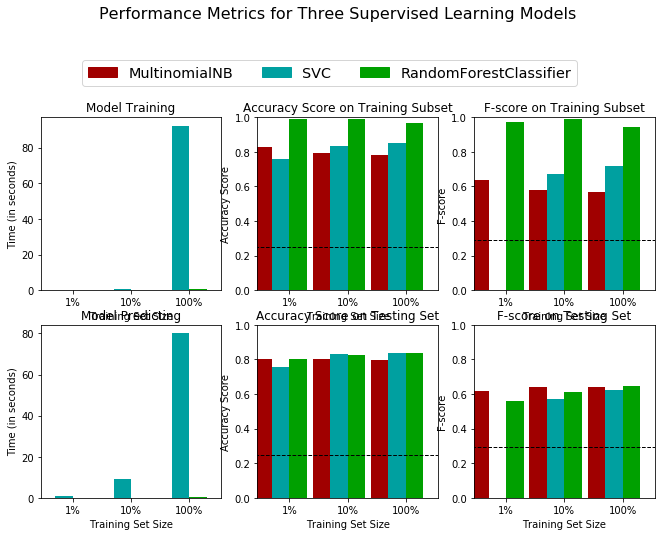

In [275]:
# TODO: Import the three supervised learning models from sklearn
# Let's retest with SVC as the 3rd model instead and determine if there's any improvement
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# TODO: Initialize the three models
clf_A = MultinomialNB
clf_B = SVC
clf_C = RandomForestClassifier

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train)//10
samples_1 = len(y_train)//100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__name__ #__class__.__name__ # this has been updated
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]): 
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [276]:
results

{'MultinomialNB': {0: {'train_time': 0.0033898353576660156,
   'pred_time': 0.021881818771362305,
   'acc_train': 0.8266666666666667,
   'acc_test': 0.8035378662244334,
   'f_train': 0.638586956521739,
   'f_test': 0.6149512459371614},
  1: {'train_time': 0.004704952239990234,
   'pred_time': 0.020931720733642578,
   'acc_train': 0.7933333333333333,
   'acc_test': 0.8043117744610282,
   'f_train': 0.5803571428571429,
   'f_test': 0.6432889963724304},
  2: {'train_time': 0.024344682693481445,
   'pred_time': 0.023910045623779297,
   'acc_train': 0.7833333333333333,
   'acc_test': 0.7964621337755666,
   'f_train': 0.5652173913043478,
   'f_test': 0.6413403467757647}},
 'SVC': {0: {'train_time': 0.011133909225463867,
   'pred_time': 1.0272841453552246,
   'acc_train': 0.76,
   'acc_test': 0.7562189054726368,
   'f_train': 0.0,
   'f_test': 0.0},
  1: {'train_time': 0.8204140663146973,
   'pred_time': 9.024793863296509,
   'acc_train': 0.8333333333333334,
   'acc_test': 0.8326147042564953,

**Analysis**
As suspected, the SVM Classifier took considerably longer to train (92.3 seconds) and predict (80.2 seconds) with the full training set and yet it still had a lower F-Score than the other models.  So we'll exclude the SVM model.  Let's take a closer look at some other ensemble methods (Bagging, AdaBoost and Gradient Boosting) to see if we can improve the F-score for the test data when the full training set is used.

BaggingClassifier trained on 361 samples.
BaggingClassifier trained on 3617 samples.
BaggingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


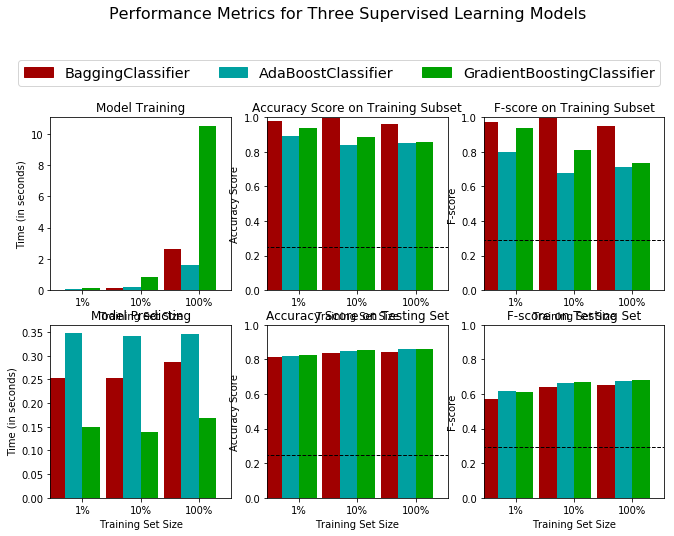

In [273]:
# TODO: Import the three supervised learning models from sklearn
# Let's retest with SVC as the 3rd model instead and determine if there's any improvement
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Initialize the three models
clf_A = BaggingClassifier
clf_B = AdaBoostClassifier
clf_C = GradientBoostingClassifier

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train)//10
samples_1 = len(y_train)//100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__name__ #__class__.__name__ # this has been updated
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]): 
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [274]:
results

{'BaggingClassifier': {0: {'train_time': 0.02133917808532715,
   'pred_time': 0.2531089782714844,
   'acc_train': 0.98,
   'acc_test': 0.8114980652294085,
   'f_train': 0.9738372093023256,
   'f_test': 0.570204184522309},
  1: {'train_time': 0.1483907699584961,
   'pred_time': 0.2538728713989258,
   'acc_train': 0.9933333333333333,
   'acc_test': 0.839469320066335,
   'f_train': 0.9943181818181817,
   'f_test': 0.6418352244696596},
  2: {'train_time': 2.6171987056732178,
   'pred_time': 0.2865281105041504,
   'acc_train': 0.9633333333333334,
   'acc_test': 0.8404643449419569,
   'f_train': 0.9487951807228915,
   'f_test': 0.6533749699735767}},
 'AdaBoostClassifier': {0: {'train_time': 0.06381797790527344,
   'pred_time': 0.34804415702819824,
   'acc_train': 0.8933333333333333,
   'acc_test': 0.8206744057490326,
   'f_train': 0.8012820512820513,
   'f_test': 0.6149097815764482},
  1: {'train_time': 0.20721030235290527,
   'pred_time': 0.34177112579345703,
   'acc_train': 0.84,
   'acc_t

**Analysis**
These other ensemble methods appear to have a better F-Scores than RandomForest and the other methods we've tested.  Based on the F-Score for the test data when the full training set was used, the GradientBoosting Classifier (0.6837) performed the best closely followed by the AdaBoost Classifier (0.6739) and Bagging (0.6534).  Performance wise, the training time for Adaboost when training with the full data set was several times faster than Gradient Boosting (i.e. 1.616 seconds versus 10.53 seconds).  This large difference in runtime performance might come more into play as far as choosing which method to use.  

**Answer:**
The final set of supervised learning methods I tested for had the best F-Scores of all methods we've tested.  Based on the F-Score for the test data when the full training set was used, the GradientBoosting Classifier (0.6837) performed the best closely followed by the AdaBoost Classifier (0.6739) and Bagging (0.6534).  Performance wise, the training time for Adaboost when training with the full data set was several times faster than Gradient Boosting (i.e. 1.616 seconds versus 10.53 seconds).  This large difference in runtime performance between AdaBoost versus Gradient Boosting weighed against the only slight difference in their F-Scores suggests that Adaboost may be the best model to use as we can further tune the model to further improve the score without having to wait an interminable time for results.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer:** 
The final model chosen 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [283]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Initialize the classifier
clf = AdaBoostClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[50, 100, 200, 400, 500], 'learning_rate':[.001, .01, .1, .5, 1, 1.5, 2, 3]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using both the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8669
Final F-score on the testing data: 0.7434


In [284]:
# Let's also explore what parameters ended up being used in the new model.
best_clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=400, random_state=None)

In [285]:
# Alternative way to determine which parameters ended up being used in the new model.
grid_fit.best_params_

{'learning_rate': 1.5, 'n_estimators': 400}

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8576       |     0.8669      |
| F-score        |      0.7246       |     0.7434      |


**Answer:**
Upon optimizing using GridSearchCV, we found our AdaBoost model's accuracy and F-score for the full testing data was 0.8669 and 0.7434 respectively.  These scores are indeed better than the unoptimized model's accuracy score and F-score of 0.8576 and .07246 respectively, meaning optimization definitely can make a measurable difference. In comparison to the naive predictor benchmarks we found in Question 1 (Accuracy: 0.2478, F-score: 0.2917), we are doing a much better job of identifying people's income than a base approach of simply assuming everyone makes over  \$50k.  Note, the optimized (hyper)parameters we've identified for the AdaBoost model for this problem were a learning_rate of 1.5 and n_estimators of 400.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

**Review: Let's do some quick review of the columns and possible values to get a sense of the different features and how each might be important**

In [286]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [298]:
data.occupation.value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [290]:
data.workclass.value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [293]:
data['education-num'].value_counts()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64

In [295]:
data['education_level'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

In [308]:
data.age.value_counts().sort_values(ascending=True).head(50)

89       1
87       1
86       1
88       5
85       5
84       9
83       9
82      10
79      20
78      21
81      27
80      29
77      39
90      46
76      46
75      53
74      59
73      82
72      83
71      90
70      96
69     116
68     136
67     180
66     180
65     217
63     280
64     285
62     328
61     394
60     398
59     488
17     493
57     514
58     517
56     534
55     574
54     584
53     689
18     695
52     700
49     810
48     815
50     829
51     835
19     864
20     916
21     935
22    1034
44    1035
Name: age, dtype: int64

In [297]:
data.race.value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
of the 13 available features, I believe the following 5 features would be the most important for prediction in order of importance along with my rationale as follows:
1. hours-per-week: if you're only working part-time, it's very difficult to earn over $50k in salary
2. occupation: your occupation largely defines your industry and the range of salaries you can make
3. education_num/education_level: historically there has been a strong positive correlation between income and education
4. workclass: similar to occuption, if you are in certain workclasses, your salary range usually falls within a certain band.
5. age there is usually a strong positive correlation between age and income due to the fact that people get more educated and gain more experience with time and so they generally get paid more. 

I would probably follow my rankings next by race, sex and marital-status: historically, race has played a part as far as the potential earnings for different groups.  This also is true for sex -- hence terms like 'glass ceiling' etc.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

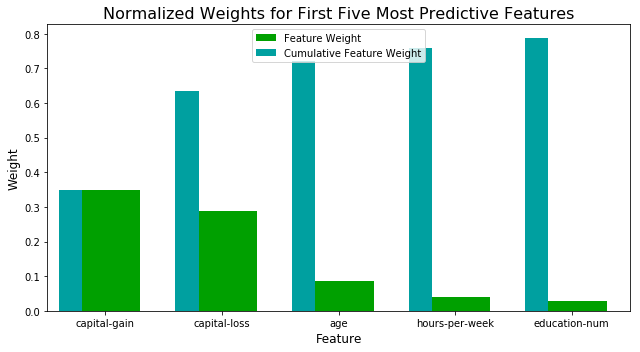

In [313]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# Luckily, I've already chosen a supervised learning model (AdaBoost) that provides for this attribute

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
# model = None 
# as noted earlier, I've already done this during my prior model tuning step above

# TODO: Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
The five most predictive features identified above differ slightly from my earlier guesses in question 6.  In part, this was because I wasn't exactly clear on what capital-gain/loss 

The earlier sections such as "explore features" didn't really explain what capital-gain/loss referred to so I didn't have much insight into what those features were (I was thinking of investment capital gains/losses).
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [315]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8669
F-score on testing data: 0.7434

Final Model trained on reduced data
------
Accuracy on testing data: 0.8421
F-score on testing data: 0.7007


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.